In [1]:
import pickle as p
import numpy as np
from os import walk
import socket
if socket.gethostname() == 'jim-Mint':
    ppi_path = '/media/jim/Research_TWO/FFT_PPI'
    home = '/home/jim'
else:
    ppi_path = '/home/jtufts/Desktop/FFT_PPI'
    home = '/home/jtufts'
f = {}
for (dirpath, dirnames, filenames) in walk(f'{ppi_path}/2.redock/7.analysis'):
    if len(filenames) > 0:
        if filenames[0] != 'run_me.sh':
            if 'rotations.p' in filenames:
                f[dirpath.split('/')[7]] = dirpath + '/rotations.p'

In [8]:
def regplot(trans_scores, delta_sasas, colors, name, system, xlim = 0, ylim = 0):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.colorbar as colorbar
    import matplotlib.cm as cm
    from scipy.stats import linregress
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    import math
    
    x = np.array(trans_scores)
    y = np.array(delta_sasas)
    C = np.array(colors)
    alpha = np.zeros(x.shape)

#     indicies = np.where(y == 0)

#     indicies = indicies[::-1]

#     for i in indicies:
#         x = np.delete(x, i)
#         y = np.delete(y, i)
#         C = np.delete(C, i)

    x = x.reshape((-1,1))

    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)

    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)
    
    pred_y = np.zeros(len(y), dtype=float)
    for ind,point in enumerate(x):
        pred_y[ind] = point*model.coef_ + model.intercept_
    
        
    MSE = mean_squared_error(y, pred_y)
 
    RMSE = math.sqrt(MSE)
    
    # scatter plot
    fig, ax = plt.subplots()
    plt.Figure.set_figheight(fig, plt.Figure.get_figheight(fig)+1)
    cmap = cm.get_cmap('hot')
    sc = ax.scatter(x, y, 10, c=C, alpha=0.5, marker='o',
            label="Shrake-Rupley Grid SASA vs ΔSASA", cmap="hot")
    # regression plot
    rx = np.linspace(x.min(), x.max(), 165)
    ry = model.coef_*rx + model.intercept_

    ax.plot(rx, ry, '-r', label=f'y={float(model.coef_):.4f}*x + {float(model.intercept_):.2f}')
    plt.xlabel("Shrake-Rupley grid-based ΔSASA")
    plt.ylabel("ΔSASA (A^2)")
    ax.set_title(f'Shrake-Rupley Grid ΔSASA score vs Shrake-Rupley R+L-C ΔSASA {chr(10)} System:{system} Rotation:All{chr(10)} R2: {r_sq}, RMSE: {RMSE}')
    ax.legend(loc='upper left')
    plt.colorbar(sc)
    # colorbar.ColorbarBase(ax,cmap=cmap,format='%.1f')
    if xlim != 0:
        x1,x2 = xlim
        plt.xlim(x1,x2)
    if ylim != 0:
        y1,y2 = ylim
        plt.ylim(y1,y2)
    plt.savefig(f'{name}', dpi=1200, pad_inches=1.)

In [3]:
def extract_scores(f):
    translations = []
    trans_scores = []
    delta_sasas = []
    colors = []
    for i in range(101):
        keys = list(f[i].keys())
        for key in keys:
            if key == "translations":
                translations.extend(f[i][key])
            elif key == "trans_scores":
                trans_scores.extend(f[i][key])
            elif key == "delta_sasas":
                delta_sasas.extend(f[i][key])
            else:
                colors.extend(f[i][key])
    return translations, trans_scores, delta_sasas, colors


In [4]:
def extract_scores_single(f):
    translations = []
    trans_scores = []
    delta_sasas = []
    colors = []
    keys = list(f.keys())
    for key in keys:
        if key == "translations":
            translations.extend(f[key])
        elif key == "trans_scores":
            trans_scores.extend(f[key])
        elif key == "delta_sasas":
            delta_sasas.extend(f[key])
        else:
            colors.extend(f[key])
    return translations, trans_scores, delta_sasas, colors

coefficient of determination: 0.9994197775003123
intercept: -0.3920491338856209
slope: [1.00077942]
coefficient of determination: 0.9994509657758464
intercept: -0.04670755157849271
slope: [1.00019926]
coefficient of determination: 0.9996601012973024
intercept: -0.23584611632509223
slope: [1.00055074]
coefficient of determination: 0.9994851600496653
intercept: -0.9302242974239334
slope: [1.0013526]
coefficient of determination: 0.9995299967215586
intercept: -0.2944360231870178
slope: [1.00055315]
coefficient of determination: 0.9998907278897493
intercept: -0.1522386787139567
slope: [1.00046624]


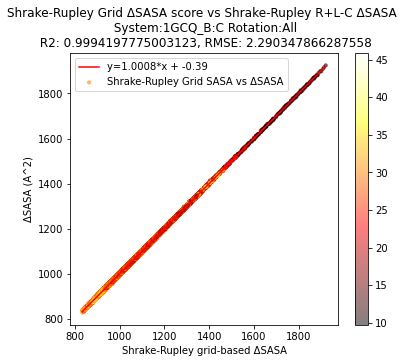

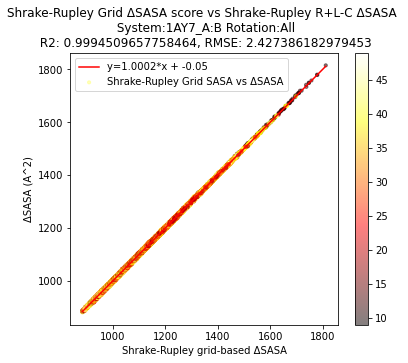

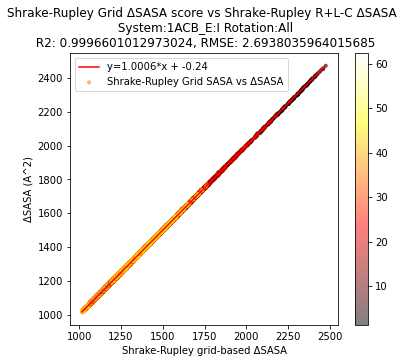

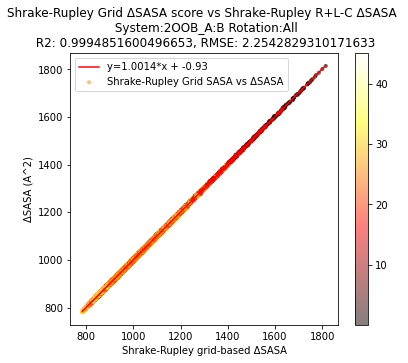

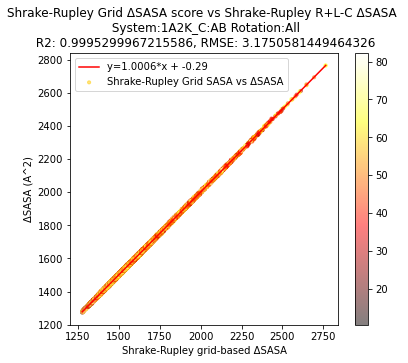

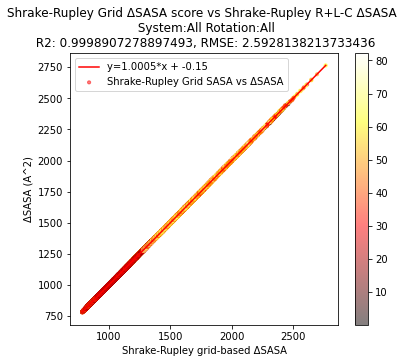

In [9]:
a_all = []
b_all = []
c_all = []
d_all = []
keys = f.keys()
for system in list(f.keys()):
    file = p.load(open(f"{f[system]}", "rb"))
    # name = f"/media/jim/Research_TWO/FFT_PPI/2.redock/7.analysis/{system}/sasa/{system[:4]}.jpg"
    ind = f[system].index("sasa")
    name = f"{f[system][:ind+4]}/{system}.jpg"
    a,b,c,d = extract_scores(file)
    regplot(b,c,d,name,system)
    a_all.extend(a)
    b_all.extend(b)
    c_all.extend(c)
    d_all.extend(d)
# regplot(b,c,d,name,ylim=(380,2100))
# regplot(b,c,d,name,system)
name = f"/media/jim/Research_TWO/FFT_PPI/2.redock/7.analysis/all.jpg"
regplot(b_all,c_all,d_all,name,"All")

coefficient of determination: 0.9998907278897493
intercept: -0.1522386787139567
slope: [1.00046624]


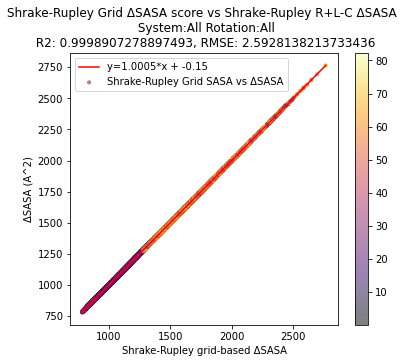

In [7]:
regplot(b_all,c_all,d_all,name,"All")

In [22]:
print(b[0]*(1.0036069) + 0.011820951733739093, b[0])

[1011.08925248] [1007.44368291]


coefficient of determination: 0.32865512113608886
intercept: 155.10642285423387
slope: [0.14871795]


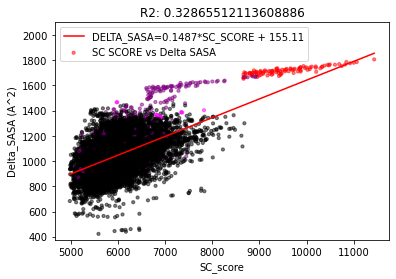

In [30]:
name2 = "/home/jim/src/p39/fftanalysis/plots/dSASA_0_5/2OOB_A.jpg"
f2 = p.load(open("/home/jim/src/p39/fftanalysis/plots/DeltaSASAvSCORE_new/rotations.p", "rb"))
e,f,g,h = extract_scores(f2)
regplot(f,g,h, name2)

In [33]:
delta_sasa_array = np.load("/home/jim/src/p39/jupyter/fftanalysis/delta_sasa_complex_minus_rl.npy")
scores = np.load("/home/jim/src/p39/jupyter/fftanalysis/scores.npy")

coefficient of determination: 0.9994851600496653
intercept: -0.9302242974239334
slope: [1.0013526]


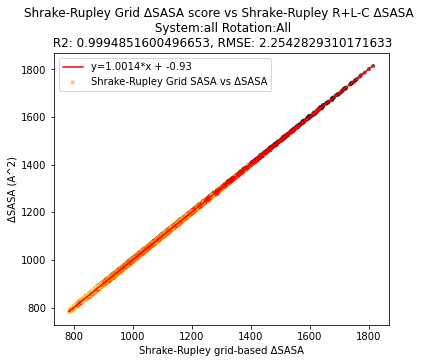

In [28]:
b_all.extend(list(scores))
c_all.extend(list(delta_sasa_array*100))
d_all.extend(['green']*len(scores))
name = "/media/jim/Research_TWO/backup/plots/ALL_OVERLAY_OLD_CORRELATION.jpg"
regplot(b,c,d,name,"all")

coefficient of determination: 0.8567018992295321
intercept: 151.2598628129599
slope: [2.0711132]


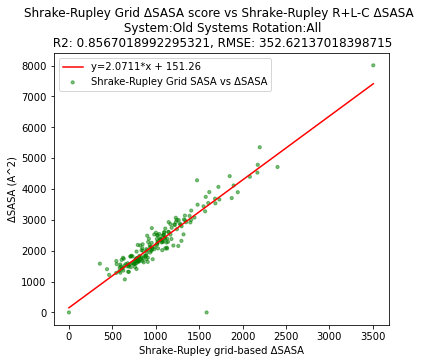

In [32]:
j = list(scores)
k = np.array(list(delta_sasa_array*100))
k[k>10000] = 0
l = ['green']*len(scores)
regplot(j,k,l,"/media/jim/Research_TWO/backup/plots/OLD_CORRELATION.jpg", "Old Systems")

In [58]:
np.where(delta_sasa_array < 1)


(array([145]),)

In [68]:
f3 = p.load(open("/home/jim/src/p39/fftanalysis/plots/DeltaSASAvSCORE_10point/2OOB_A_200_200.p", "rb"))

coefficient of determination: 0.31106240762208437
intercept: 154.27960757514472
slope: [0.15189597]


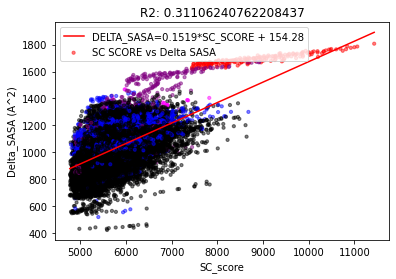

In [77]:
i,j,k,l = extract_scores_single(f3)
name = "/home/jim/src/p39/fftanalysis/plots/dSASA_0_5/2OOB_A_BANDING.jpg"
regplot(j,k,l,name)